### Problem

In [2]:
import matplotlib.pyplot as plt
import cv2

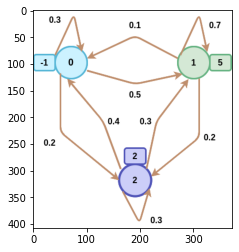

In [4]:
img=cv2.imread("new_mrp.png")
plt.imshow(img)
plt.show()

### Analytic Method

In [1]:
import numpy as np
import tensorflow as tf

In [2]:
### Analytic soln is given as:

### V= R + gamma*P*V
### V-gamma*P*V = R
### V(I-gamma*P) = R      ### I is the identity matrix of dimension of P
### V = R / (I - gamma*P)

### Coding approach: V = (Inverse(I - gamma*P))*R

In [5]:
def get_analytic_soln(Transition_Matrix, Reward_Matrix, Gamma):

  Identity=np.identity(Transition_Matrix.shape[0])
  ### Initializes an identity martrix of dimension N x N where N is the number of states.

  Value_func= np.matmul(np.matrix(Identity - Gamma*Transition_Matrix).I,R)
  ###Value function calculated.

  print("Value")
  print(Value_func)


In [6]:
Ptr=np.array([
    [0.3,0.5,0.2],
    [0.1,0.7,0.2],
    [0.4,0.3,0.3]
])                ### Transition Matrix
R=np.array([
    [-1],
    [5],
    [-2]
])                ### Reward Matrix

gamma=0.9         ### Gamma: Discount factor

get_analytic_soln(Ptr,R,gamma)

Value
[[18.34360761]
 [25.66068078]
 [15.79737336]]


### Dynamic Programming Solution

In [9]:
### Bellman Operator

### V' = R + gamma*P*V

### It is given by: B(V). B is the bellman operator

### Bellman operator is a contracting operator. So, Bellman operator guarantees convergence of the parameters passed. 

### The discount factor gamma gives the importance of the future and the present rewards. It slowly fades
### the rewards of a further timestep, so we do not face a infinite horizon problem

### gamma= 0.9 means we consider next 50 time steps
### gamma= 0.99 means we consider next 10 time steps.

### By definition, Value Function (V) is given by: The discounted expected sum of returns

### V(s)= E [ R_t + gamma*R_t+1 + gamma^2*R_t+2...........]

### So, for expectation: 

### V(S)= R_t + P(S1)*gamma*R_t+1+ P(S2)*gamma*R_t+1 +..............

### When we unroll the equation we will obtain the form.

### As it is the unrolling form, it is called the dynamic programming approach.

In [ ]:
"""
[0.3,0.5,0.2] * [0]     [0]         [-1]      [-1] 
[0.1,0.7,0.2]   [0]  =  [0] * 0.9 + [5]    =  [5]    
[0.4,0.3,0.3]   [0]     [0]         [2]       [2]  

Value updated after iteration 1

[0.3,0.5,0.2]   [-1]    [2.6]            [2.3]     [-1]     [1.3]
[0.1,0.7,0.2] * [5] =   [3.8]  *  0.9 =  [3.4]  +  [5]   =  [8.4]
[0.4,0.3,0.3]   [2]     [1.7]            [1.5]     [2]      [3.5]

Value updated after iteration 2

"""

In [13]:
def dynamic_prog_soln(Transition_Matrix, Rewards_Matrix, gamma, epsilon):

  #### Epsilon judges the convergence
  #### If the L2 Norm of the differnce of the Value function at time step t-1 and t is not 
  #### more than the value epsilon, convergence is said to have been achieved.

  V_current=np.zeros((Transition_Matrix.shape[0],1))
  V_previous=np.ones((Transition_Matrix.shape[0],1))

  ### Initializing the value functions of two time steps to condition convergence.

  while np.sqrt(np.square(sum(V_current-V_previous)))>epsilon:   ### Checking convergence

    V_previous=V_current ###  Updating Previous value function

    V_current= Rewards_Matrix + gamma*np.matmul(Transition_Matrix,V_current)
    #### Updating the current value function.

  print("Value Function")
  print(V_current)
  

In [14]:
Ptr=np.array([
    [0.3,0.5,0.2],
    [0.1,0.7,0.2],
    [0.4,0.3,0.3]
])                ### Transition Matrix
R=np.array([
    [-1],
    [5],
    [-2]
])                ### Reward Matrix

gamma=0.9         ### Gamma: Discount factor

epsilon=0.001

dynamic_prog_soln(Ptr,R,gamma,epsilon)


Value Function
[[18.34077662]
 [25.6578498 ]
 [15.79454237]]
